# **Loan Approval Prediction Machine Learning**

**Connect to the Google Drive**

In [422]:
from google.colab import drive

In [423]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the Dataset

In [424]:
import pandas as pd

In [425]:
data = pd.read_csv('/content/drive/MyDrive/data/loan_approval_dataset.csv')

In [426]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Get Data Rows and Columns**

In [427]:
data.shape

(4269, 13)

**Check is there are NULL values or Not**

In [428]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


**Data types of Each column**

In [429]:
data.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [430]:
data.duplicated().sum()

0

**Data Information**

In [431]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**Drop loan id column**

In [432]:
data = data.drop(columns = ['loan_id'])

**Print Data Columns**

In [433]:
print(data.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


in here there are spaces in column values


**Remove unwanted spaces of column values**

# Data Processing

In [434]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


**Print unique values of each column**

In [435]:
unique_counts = data.nunique()
print(unique_counts)

no_of_dependents              6
education                     2
self_employed                 2
income_annum                 98
loan_amount                 378
loan_term                    10
cibil_score                 601
residential_assets_value    278
commercial_assets_value     188
luxury_assets_value         379
bank_asset_value            146
loan_status                   2
dtype: int64


In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [437]:
data['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [438]:
data['education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


In [439]:
data['self_employed'].value_counts()

,count
self_employed,
Yes,2150
No,2119


In [440]:
data.self_employed.unique() #there is spaces in values

array([' No', ' Yes'], dtype=object)

In [441]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [442]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [443]:
data['loan_status'] = data['loan_status'].str.strip()   # remove additional value spaces
data['education'] = data['education'].str.strip()
data['self_employed'] = data['self_employed'].str.strip()

In [444]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Data Visualization

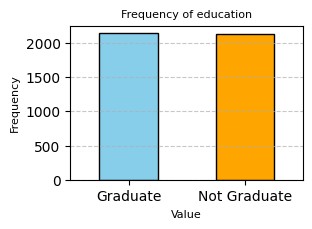

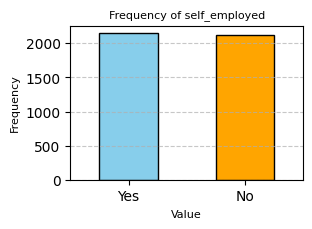

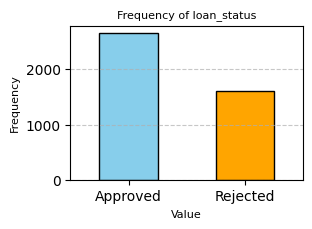

In [445]:
string_columns = ['education','self_employed','loan_status'] #visualize the data
import matplotlib.pyplot as plt
for column in string_columns:
      plt.figure(figsize=(3, 2))
      data[column].value_counts().plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
      plt.title(f'Frequency of {column}', fontsize=8)
      plt.xlabel('Value', fontsize=8)
      plt.ylabel('Frequency', fontsize=8)
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()
      print("\n")

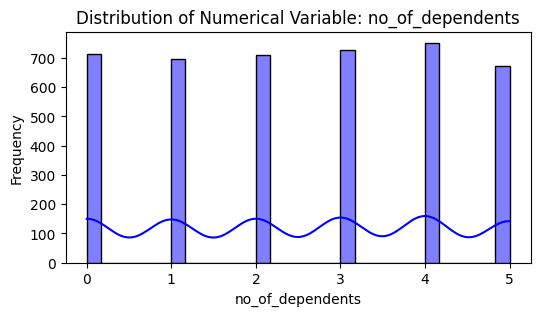

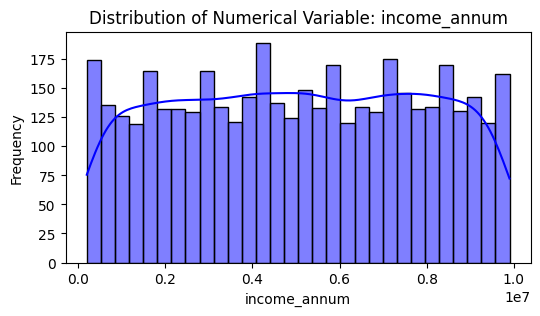

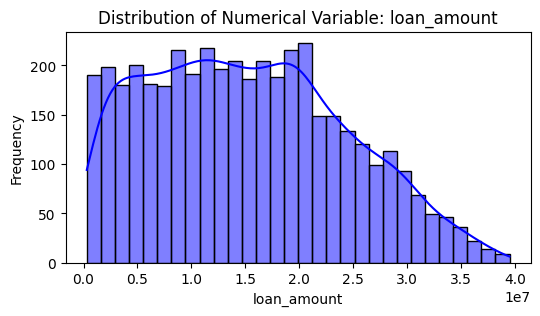

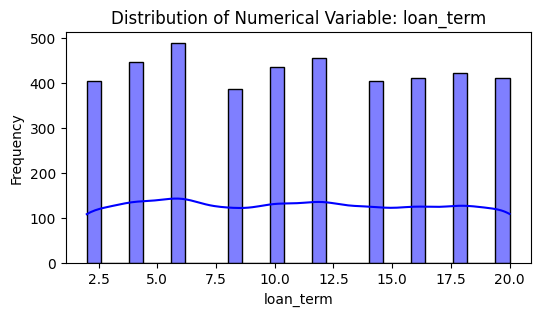

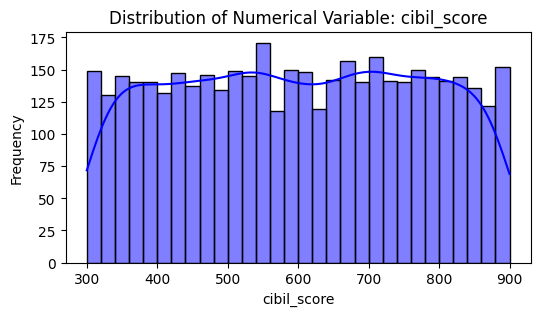

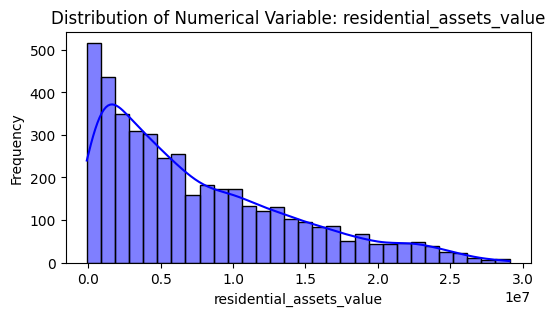

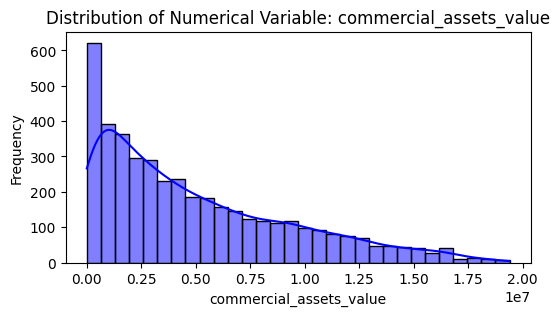

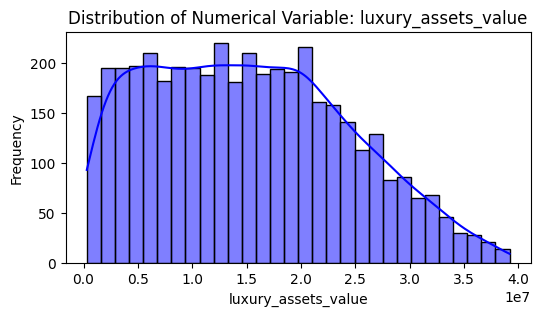

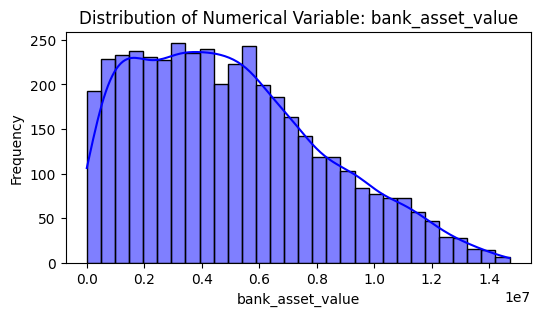

In [446]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of Numerical Variable: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Feature Engineering

In [447]:
data['education'] = data['education'].apply(lambda x: 1 if str(x) == "Graduate" else 0) # 1 if true and 0 if false convert string values into numeric
data['self_employed'] = data['self_employed'].apply(lambda x: 1 if str(x) == "Yes" else 0)
data['loan_status'] = data['loan_status'].apply(lambda x: 1 if str(x) == "Approved" else 0)

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [449]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


**Rename the income_annum to annual_income**

In [450]:
data.rename(columns={'income_annum': 'annual_income'}, inplace=True)

**Added a new Feature of assets by replacing all assets columns**

In [451]:
data['assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']
assets_sub_column_list = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
data = data.drop(columns= assets_sub_column_list)
data.head()

,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000


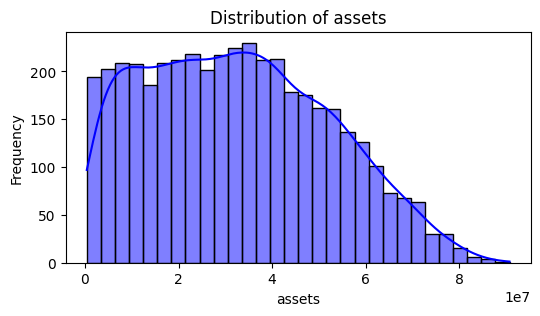

In [452]:
plt.figure(figsize=(6, 3))
sns.histplot(data['assets'], kde=True, bins=30, color='blue')
plt.title(f'Distribution of assets')
plt.xlabel('assets')
plt.ylabel('Frequency')
plt.show()

**This shows that there are outliers at the end of graph**

# Outlier Detection

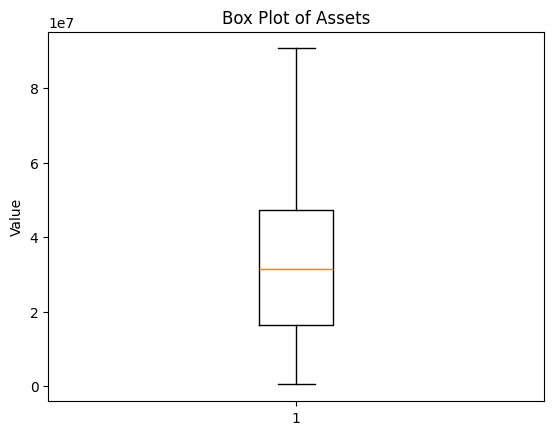

In [453]:
#Bod Plot of Assets
plt.boxplot(data['assets'])
plt.title('Box Plot of Assets')
plt.ylabel('Value')
plt.show()

In [454]:
data['assets'].describe()

,assets
count,4.269000e+03
mean,3.254877e+07
std,1.950656e+07
min,4.000000e+05
25%,1.630000e+07
50%,3.150000e+07
75%,4.720000e+07
max,9.070000e+07


In [455]:
import numpy as np
mean = np.mean(data['assets'])
std = np.std(data['assets'])
data['assets-z_scores'] = (data['assets']-mean)/std
data.head()

,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,loan_status,assets,assets-z_scores
0,2,1,0,9600000,29900000,12,778,1,50700000,0.930628
1,0,0,1,4100000,12200000,8,417,0,17000000,-0.797198
2,3,1,0,9100000,29700000,20,506,0,57700000,1.289524
3,3,1,0,8200000,30700000,8,467,0,52700000,1.033170
4,5,0,1,9800000,24200000,20,382,0,55000000,1.151093


In [456]:
data[data['assets-z_scores']>2.5]

,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,loan_status,assets,assets-z_scores
98,4,1,0,9400000,29400000,12,562,1,84600000,2.668708
367,1,0,1,9400000,29800000,10,377,0,85200000,2.699471
895,0,1,0,9400000,27900000,6,456,0,83300000,2.602056
987,5,1,0,9400000,25800000,14,625,1,85500000,2.714852
1272,5,0,0,9900000,35800000,20,470,0,81700000,2.520023
1304,2,1,1,9400000,24800000,14,513,0,87100000,2.796885
1419,2,1,0,9100000,21700000,12,549,0,83400000,2.607183
1768,4,0,0,9900000,29100000,18,772,1,82000000,2.535404
2455,1,1,1,8400000,19700000,6,476,0,85100000,2.694344
3119,4,0,0,9800000,29400000,8,592,1,90700000,2.981460


In [457]:
outliers_indexes = []
outliers_indexes.extend(data.index[data['assets-z_scores']>2].tolist())
data = data.drop(data.index[outliers_indexes])
data = data.drop(columns = 'assets-z_scores')
data

,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4263,3,1,0,5000000,12700000,14,865,1,38600000
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000


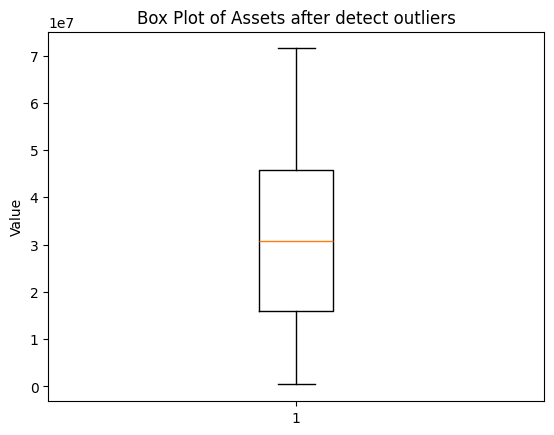

In [458]:
#Bod Plot of Assets after detect outliers
plt.boxplot(data['assets'])
plt.title('Box Plot of Assets after detect outliers')
plt.ylabel('Value')
plt.show()

# Train Test Split

In [459]:
X = data.drop(columns=['loan_status'])  # Drop the target column from the dataset
y = data['loan_status']                # Target column (dependent variable)

In [460]:
from sklearn.model_selection import train_test_split #divide data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3336, 8), (835, 8), (3336,), (835,))

# Model Training

**Apply Scaller model**

In [461]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Define a method to find the performance of specific model**

In [462]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, r2_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def calculate_accuracy(model, X_train, X_test, y_train, y_test):
         model.fit(X_train, y_train)
         y_pred = model.predict(X_test)
         y_pred_train = model.predict(X_train)
         accuracy = accuracy_score(y_test, y_pred)
         accuracy_train = accuracy_score(y_train, y_pred_train)
         print(f"{model} testing accuracy is {accuracy}")
         print(f"{model} training accuracy is {accuracy_train}")

         r2 = r2_score(y_test, y_pred)
         print(f"{model} r2 score is: {r2} ")

         roc_auc = roc_auc_score(y_test, y_pred)
         print(f"{model} roc score is: {roc_auc} ")

         print("\n")

         conf_matrix = confusion_matrix(y_test, y_pred)
         plt.figure(figsize=(3, 3))
         sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0'])
         plt.title('Confusion Matrix',fontsize=10)
         plt.xlabel('Predicted Labels',fontsize=8)
         plt.ylabel('Actual Labels', fontsize=8)
         plt.show()

         print("\n")

         report = classification_report(y_test, y_pred)
         print("Classification Report:\n", report)


**Apply Logistic Regression**

LogisticRegression() testing accuracy is 0.9269461077844311
LogisticRegression() training accuracy is 0.9154676258992805
LogisticRegression() r2 score is: 0.6831099829532022 
LogisticRegression() roc score is: 0.9175158958278896 




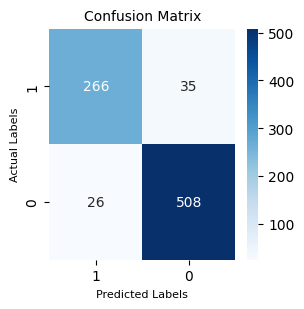



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       301
           1       0.94      0.95      0.94       534

    accuracy                           0.93       835
   macro avg       0.92      0.92      0.92       835
weighted avg       0.93      0.93      0.93       835



In [463]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
calculate_accuracy(logistic_model,X_train_scaled,X_test_scaled, y_train, y_test)

**Apply SVM**

SVC() testing accuracy is 0.948502994011976
SVC() training accuracy is 0.9583333333333334
SVC() r2 score is: 0.7766185125735687 
SVC() roc score is: 0.9459666280936205 




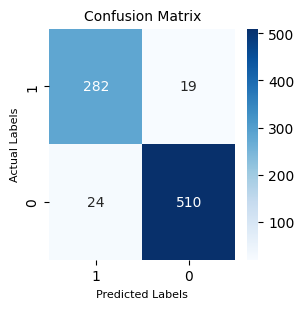



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       301
           1       0.96      0.96      0.96       534

    accuracy                           0.95       835
   macro avg       0.94      0.95      0.94       835
weighted avg       0.95      0.95      0.95       835



In [464]:
from sklearn.svm import SVC
SVM_model = SVC()
calculate_accuracy(SVM_model,X_train_scaled, X_test_scaled, y_train, y_test)

# Cross Validation

In [465]:
from sklearn.model_selection import cross_val_score
#Scale X data
X_scaled = scaler.fit_transform(X)

# Use X_scaled instead of X for cross-validation
CV_logistic = cross_val_score(logistic_model, X_scaled, y, cv=5).mean()
CV_SVM = cross_val_score(SVM_model,X_scaled,y,cv=5).mean()

print("SVM cv score ",CV_SVM)
print("logistic cv score ",CV_logistic)

SVM cv score  0.945095133474059
logistic cv score  0.9175238013182268


# Model Selection

Overall SVM Gives better accuracy than the Logistic Regression

In [466]:
#test model using sample Data
sampleX1 = [5, 0, 1, 9800000, 24200000, 20, 382, 12400000]
sampleX2 = [2,	1,	0,	9600000,	29900000,	12,	778,	2400000]

feature_names = [
    'no_of_dependents', 'education', 'self_employed', 'annual_income',
    'loan_amount', 'loan_term', 'cibil_score', 'assets'
]
sampleX1_df = pd.DataFrame([sampleX1], columns=feature_names)
sampleX2_df = pd.DataFrame([sampleX2], columns=feature_names)

# Scale the input data
sampleX1_scaled = scaler.transform(sampleX1_df)
sampleX2_scaled = scaler.transform(sampleX2_df)

#predict the output
sample_pred1 = SVM_model.predict(sampleX1_scaled)
sample_pred2 = SVM_model.predict(sampleX2_scaled)
sample_pred1 , sample_pred2

(array([0]), array([1]))

**Get the models**

In [467]:
import pickle
with open('scaler_model.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('SVM_model.pkl', 'wb') as svm_file:
    pickle.dump(SVM_model, svm_file)

with open('logistic_model.pkl', 'wb') as logistic_file:
    pickle.dump(logistic_model, logistic_file)


**Download the models**

In [468]:
from google.colab import files
files.download('scaler_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [469]:
files.download('SVM_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [470]:
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>